<a href="https://colab.research.google.com/github/lijerrymagic/MLColabAssignment/blob/master/Copy_of_1_explore_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: zl3719
-   **Name**: Zeyu Li

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=31928890d4c9fde9'
df = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [ ]:
# TODO Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 546981 non-null  object 
 1   country_region                                      547922 non-null  object 
 2   sub_region_1                                        531587 non-null  object 
 3   sub_region_2                                        316625 non-null  object 
 4   iso_3166_2_code                                     198752 non-null  object 
 5   census_fips_code                                    316746 non-null  float64
 6   date                                                547922 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   406061 non-n

In [ ]:
# TODO Q3
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [ ]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 546981 non-null  object        
 1   country_region                                      547922 non-null  object        
 2   sub_region_1                                        531587 non-null  object        
 3   sub_region_2                                        316625 non-null  object        
 4   iso_3166_2_code                                     198752 non-null  object        
 5   census_fips_code                                    316746 non-null  float64       
 6   date                                                547922 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64       

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [ ]:
# TODO Q5
df_subset = df[(df['country_region'].eq("Canada")) & (df['sub_region_1'].eq("Ontario")) & (df['sub_region_2'].isnull())]
df_subset.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
21196,CA,Canada,Ontario,NaN,CA-ON,NaN,2020-02-15,2.0,3.0,20.0,5.0,1.0,-1.0
21197,CA,Canada,Ontario,NaN,CA-ON,NaN,2020-02-16,16.0,13.0,44.0,5.0,-2.0,-2.0
21198,CA,Canada,Ontario,NaN,CA-ON,NaN,2020-02-17,-26.0,-37.0,70.0,-40.0,-72.0,16.0
21199,CA,Canada,Ontario,NaN,CA-ON,NaN,2020-02-18,-1.0,12.0,-5.0,2.0,0.0,1.0
21200,CA,Canada,Ontario,NaN,CA-ON,NaN,2020-02-19,0.0,4.0,-4.0,-2.0,1.0,0.0


Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [ ]:
# TODO Q6
# get beginning and end of date range
min_date = df_subset.date.min().date()
max_date = df_subset.date.max().date()
print(min_date)
print(max_date)

# then try to identify the missing days
expected_date_range = pd.date_range(start = min_date, end = max_date, freq='D' )
potential_missing_days = expected_date_range.difference(df_subset['date'])
print(potential_missing_days)
# So there are no missing days

# to be more safe, check for missing values
df_subset.isnull().sum()
# We can see there are no null value for ...percent_change_from_baseline fields, data seems complete

2020-02-15
2020-06-14
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


country_region_code                                     0
country_region                                          0
sub_region_1                                            0
sub_region_2                                          121
iso_3166_2_code                                         0
census_fips_code                                      121
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64

**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

**Answer:** The data seems complete for the location I have chosen. The potential reason that only partial data available could because it does not meet quality or privacy threshold. Quote can be taken from 'Gaps and spikes section' in Understand the data page : **'You might see data gaps for some categories in your region. These gaps are intentional and happen because the data doesn’t meet the quality and privacy threshold—when there isn’t enough data to ensure anonymity'**

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [ ]:
# TODO Q8
days_since_lockdown_ontario = (df_subset['date'] - pd.to_datetime('2020-03-25 00:00:00')).dt.days.values
print(days_since_lockdown_ontario)
# Ontario orders all non-essential businesses to shut down March 24 11:59pm, 2020 https://toronto.ctvnews.ca/ontario-orders-all-non-essential-businesses-to-shut-down-1.4864492

[-39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22
 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81]


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

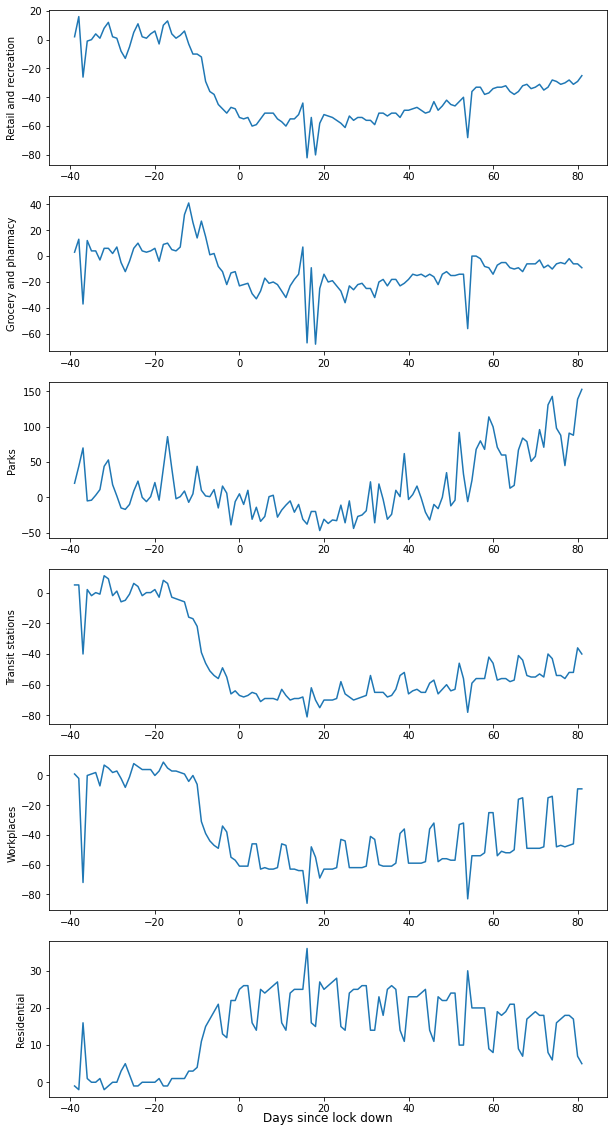

In [ ]:
# TODO Q9

# Set up x axis and y axis values
x = days_since_lockdown_ontario
y_retail = df_subset['retail_and_recreation_percent_change_from_baseline'].values
y_grocery = df_subset['grocery_and_pharmacy_percent_change_from_baseline'].values
y_parks = df_subset['parks_percent_change_from_baseline'].values
y_transit = df_subset['transit_stations_percent_change_from_baseline'].values
y_workplaces = df_subset['workplaces_percent_change_from_baseline'].values
y_residential = df_subset['residential_percent_change_from_baseline'].values


# Set up a figure size to make it look more clear
fig, axs = plt.subplots(6,1,figsize=(10,20))

plt.subplot(6, 1, 1)
plt.plot(x, y_retail)
plt.ylabel("Retail and recreation")
plt.subplot(6, 1, 2)
plt.plot(x, y_grocery)
plt.ylabel("Grocery and pharmacy")
plt.subplot(6, 1, 3)
plt.plot(x, y_parks)
plt.ylabel("Parks")
plt.subplot(6, 1, 4)
plt.plot(x, y_transit)
plt.ylabel("Transit stations")
plt.subplot(6, 1, 5)
plt.plot(x, y_workplaces)
plt.ylabel("Workplaces")
plt.subplot(6, 1, 6)
plt.plot(x, y_residential)
plt.ylabel("Residential")
plt.title("Days since lock down", y=-0.2)

# Show the figure.
plt.show()

**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**Answer:** Yes. The results I am getting from plots above seem to satisfy "common" sense". All plots above have a 'curve' either as a increment or decrement around the shut down date I selected, and it is satisfying the common sense because when the outbreak begins(and it was beginning before the shut down date), those places were affected dramatically at that period due to closure. 

Take, the workplaces plot as an example which is the second last plots above. we can observe a drop curve from -20 days of the shut down date all the way to +20 days, the percentage of visits drops around those dates should definetly due to the closure of all workplaces in the location and when everybody started to work from home.


**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

**Answer:** The location I have chosen is Ontario, and base on the experience I lived here, the weather in here is veary unstable and the winter is very long here till May (The temperature and still be low). Thus, the parks percentage change plots does not seems that helpful for understanding user mobility because the percentage change could due to the weather change, and the drop could because another cold wave which is very usual in Ontario. And the vistors for park would be influenced a lot because of the weather instability and change. So that data sets related to weather or outdoor activities would not be that useful for the purpose of understanding how Covid-19 affected those places.